In [1]:
%env PYTORCH_ENABLE_MPS_FALLBACK=1
from fastbook import *
from fastai.vision.widgets import *

In [2]:
flower_types = 'crimson','dandelion','rose'
path=Path('flowers')

In [3]:
if not path.exists():
    path.mkdir()
for o in flower_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} flower', max_images=50)
    download_images(dest, urls=results)

In [4]:
fns = get_image_files(path)
fns

(#290) [Path('flowers/crimson/092b8382-5a09-4451-8659-000ec194427f.jpg'),Path('flowers/crimson/f1edc513-4cad-45f0-8055-9372ce1d161c.jpg'),Path('flowers/crimson/144d44e0-90c8-4515-a9d1-f437eef76034.jpg'),Path('flowers/crimson/d00a6013-a750-4090-acea-e0f6640893f6.jpg'),Path('flowers/crimson/f0008bd7-32be-44a0-89d1-36889b9c457a.jpg'),Path('flowers/crimson/88a00217-4c7e-4fed-9e41-ea8ba1841739.jpg'),Path('flowers/crimson/1a391a0e-b89c-4ee8-9dac-7f942be1a479.jpg'),Path('flowers/crimson/6381e92f-f98f-4b0e-b5a0-779878b2f6c1.jpg'),Path('flowers/crimson/0a5223c1-9e1e-4006-a6ff-18b9a2ec6363.jpg'),Path('flowers/crimson/14ac17c1-e79b-46af-82c0-a9e24f191227.jpg')...]

In [5]:
failed = verify_images(fns)
failed

(#2) [Path('flowers/dandelion/8286a8b6-ee21-4d5a-8f02-6f0d706fbea6.jpg'),Path('flowers/dandelion/c49c439c-79bc-40a8-9049-e31ce7e86f20.jpg')]

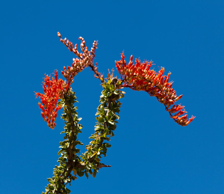

In [6]:
im = Image.open(fns[0])
im.to_thumb(224)

In [7]:
flowers = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=78),
    get_y=parent_label,
    item_tfms=Resize(224)
    )

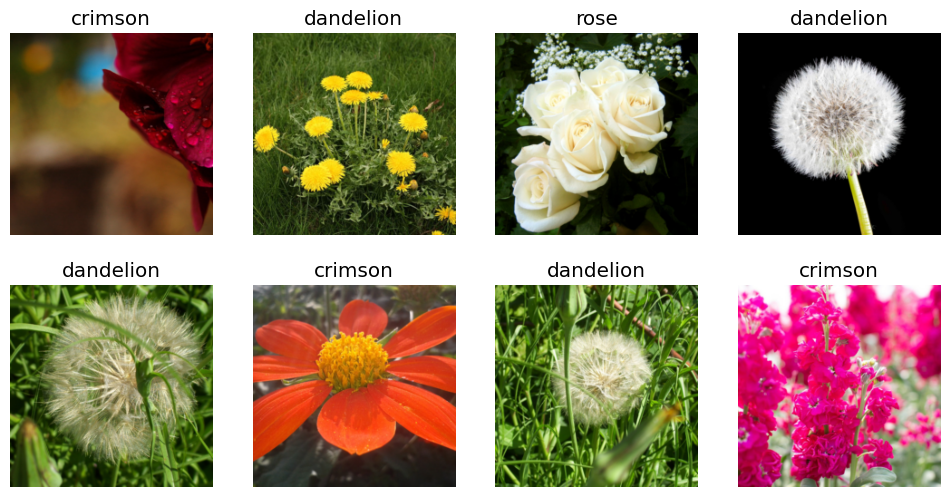

In [8]:
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

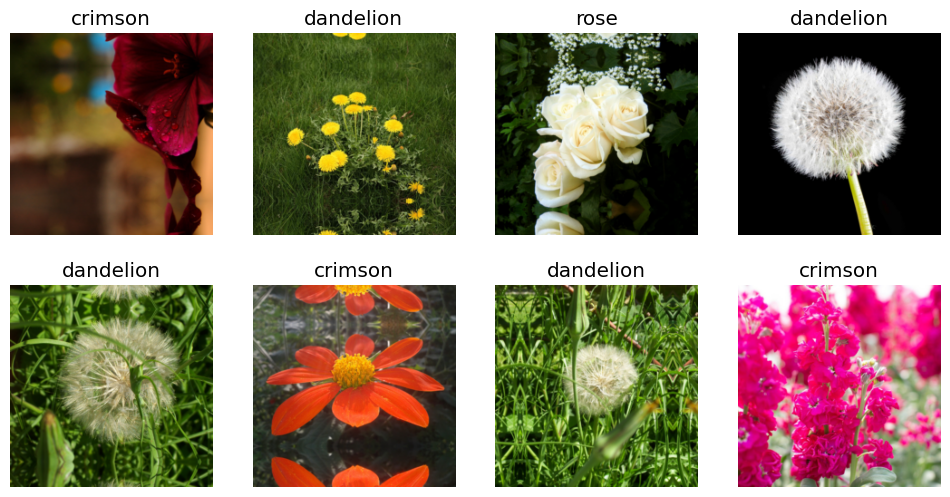

In [9]:
flowers = flowers.new(item_tfms=Resize(224, ResizeMethod.Pad))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

In [10]:
flowers = flowers.new(item_tfms=Resize(224), batch_tfms=aug_transforms(mult=2))
dls = flowers.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2, unique=True)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


NotImplementedError: The operator 'aten::_linalg_solve_ex.result' is not currently implemented for the MPS device. If you want this op to be added in priority during the prototype phase of this feature, please comment on https://github.com/pytorch/pytorch/issues/77764. As a temporary fix, you can set the environment variable `PYTORCH_ENABLE_MPS_FALLBACK=1` to use the CPU as a fallback for this op. WARNING: this will be slower than running natively on MPS.